In [1]:
import pandas as pd
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

directory_path = "/home/pgarcia/rbp_project/data"
perf = pd.DataFrame()

# Loop through all files in the directory
for file_path in os.listdir(directory_path):
    data_path = os.path.join(directory_path, file_path)

    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(data_path):

        # Process the file here
        print("Processing:", file_path)
        
        # Processing code goes here
        
        from data_4_models import data_arrays, input_shape_check
        x_train, y_train, x_valid, y_valid, x_test, y_test, alphabet = data_arrays(data_path)
        print(x_train.shape, y_train.shape)


        x_train, x_test, x_valid = input_shape_check(x_train, x_test,x_valid) #check shape of data
        
        # import models
        from rbp_models import deepbind, deepbind_exp, baseline_cnn, baseline_cnn_exp
        rbp_models_list = [deepbind, deepbind_exp, baseline_cnn, baseline_cnn_exp]
        for m_func in rbp_models_list:
            model = m_func() # call function to create model
            loss = keras.losses.BinaryCrossentropy()
            opti = tf.keras.optimizers.Adam(learning_rate = 0.005)
            

            # Compile the model
            model.compile(
                loss=loss,
                optimizer=opti, 
                metrics=[
                    tf.keras.metrics.AUC(curve="ROC", name="auroc"),
                    tf.keras.metrics.AUC(curve="PR", name="aupr"),  # add AUPR curve to track dataset bias
                    tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
                ])
            # Define an early stopping callback
            es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

            # Train the model
            model.fit(
                x_train, y_train,
                batch_size=100,
                epochs=100,
                validation_data=(x_valid, y_valid),
                callbacks=[es_callback]
            )
            # Saving model
            model.save(f'models_deepbind3/{m_func.__name__} + {file_path}') 

            # Evaluate model
            eval = model.evaluate(x_test, y_test)


            # Add performance data to Dataframe
            performance_data = {
                "Exp": [file_path],
                "Model": [m_func.__name__],
                "Loss": [eval[0]],
                "AUROC": [eval[1]],
                "AUPR": [eval[2]],
                "Accuracy": [eval[3]],
                "Dir": [data_path]
            }
            # Convert dictionary to DataFrame
            performance_data = pd.DataFrame(performance_data)

            # Add new rows to DataFrame
            perf = pd.concat([perf, performance_data], ignore_index=True)

            # convert DataFrame to CSV file
            perf.to_csv(path_or_buf='/home/pgarcia/rbp_project/perf_data_10rbps.csv')




2023-10-31 10:51:15.412399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 10:51:15.443747: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 10:51:15.444229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 10:51:16.364155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Processing: HNRNPK_K562_200.h5
(4008, 200, 9) (4008, 1)
Input shape adjusted:
(4008, 200, 4)
(1146, 200, 4)
(572, 200, 4)
Epoch 1/100


2023-10-31 10:51:17.965289: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


41/41 [==============================] - 1s 10ms/step - loss: 0.3306 - auroc: 0.9352 - aupr: 0.9321 - binary_accuracy: 0.8543 - val_loss: 0.1614 - val_auroc: 0.9853 - val_aupr: 0.9841 - val_binary_accuracy: 0.9406
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1580 - auroc: 0.9832 - aupr: 0.9814 - binary_accuracy: 0.9426 - val_loss: 0.1891 - val_auroc: 0.9899 - val_aupr: 0.9897 - val_binary_accuracy: 0.9248
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1451 - auroc: 0.9859 - aupr: 0.9858 - binary_accuracy: 0.9469 - val_loss: 0.1441 - val_auroc: 0.9923 - val_aupr: 0.9924 - val_binary_accuracy: 0.9406
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1208 - auroc: 0.9903 - aupr: 0.9889 - binary_accuracy: 0.9571 - val_loss: 0.1326 - val_auroc: 0.9929 - val_aupr: 0.9930 - val_binary_accuracy: 0.9458
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1076 - auroc: 0.9921 - aupr: 0.9910 

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
41/41 [==============================] - 1s 11ms/step - loss: 0.4940 - auroc: 0.8473 - aupr: 0.8380 - binary_accuracy: 0.7715 - val_loss: 0.2856 - val_auroc: 0.9787 - val_aupr: 0.9747 - val_binary_accuracy: 0.8986
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1885 - auroc: 0.9767 - aupr: 0.9718 - binary_accuracy: 0.9331 - val_loss: 0.1559 - val_auroc: 0.9861 - val_aupr: 0.9849 - val_binary_accuracy: 0.9388
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1538 - auroc: 0.9845 - aupr: 0.9823 - binary_accuracy: 0.9454 - val_loss: 0.1359 - val_auroc: 0.9893 - val_aupr: 0.9886 - val_binary_accuracy: 0.9423
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1335 - auroc: 0.9877 - aupr: 0.9861 - binary_accuracy: 0.9501 - val_loss: 0.1390 - val_auroc: 0.9910 - val_aupr: 0.9904 - val_binary_accuracy: 0.9493
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1246 - auroc: 0.9897 - a

In [2]:
# Look at CSV
pd.read_csv('perf_data_10rbps.csv',index_col=0)

# load model and add accuracy to the CSV

# clean up dataframe (remove "_test")

,Exp,Model,Loss,AUROC,AUPR,Accuracy,Dir
0,HNRNPK_K562_200.h5,deepbind,0.243198,0.977016,0.974916,0.931065,/home/pgarcia/rbp_project/data/HNRNPK_K562_200.h5
1,HNRNPK_K562_200.h5,deepbind_exp,0.201808,0.978255,0.976007,0.933682,/home/pgarcia/rbp_project/data/HNRNPK_K562_200.h5
2,HNRNPK_K562_200.h5,baseline_cnn,0.229653,0.980639,0.979791,0.934555,/home/pgarcia/rbp_project/data/HNRNPK_K562_200.h5
3,HNRNPK_K562_200.h5,baseline_cnn_exp,0.196165,0.980351,0.971561,0.943281,/home/pgarcia/rbp_project/data/HNRNPK_K562_200.h5
4,PTBP1_K562_200.h5,deepbind,0.211431,0.976631,0.980031,0.915045,/home/pgarcia/rbp_project/data/PTBP1_K562_200.h5
5,PTBP1_K562_200.h5,deepbind_exp,0.172111,0.980363,0.982465,0.928329,/home/pgarcia/rbp_project/data/PTBP1_K562_200.h5
6,PTBP1_K562_200.h5,baseline_cnn,0.200818,0.978184,0.979211,0.930491,/home/pgarcia/rbp_project/data/PTBP1_K562_200.h5
7,PTBP1_K562_200.h5,baseline_cnn_exp,0.183511,0.977798,0.981644,0.925239,/home/pgarcia/rbp_project/data/PTBP1_K562_200.h5
8,PUM2_K562_200.h5,deepbind,0.302554,0.949903,0.951401,0.877241,/home/pgarcia/rbp_project/data/PUM2_K562_200.h5
9,PUM2_K562_200.h5,deepbind_exp,0.314208,0.945462,0.947392,0.869655,/home/pgarcia/rbp_project/data/PUM2_K562_200.h5


/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

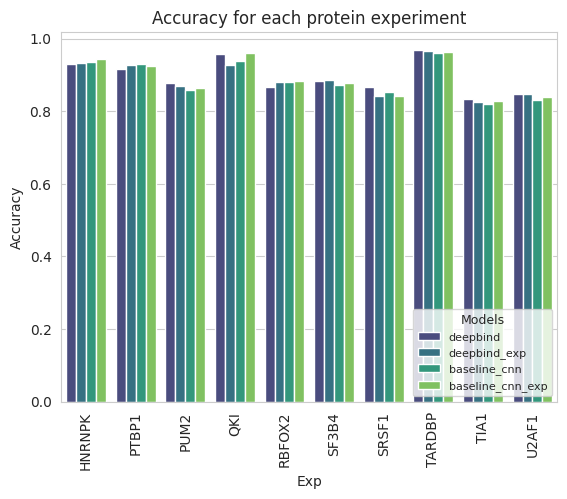

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#add csv file to dataframe
df = pd.read_csv('perf_data_test.csv',index_col=0)

# Define a function to remove the last 12 characters from a string
def remove_last_12_chars(s):
    return s[:-12] if len(s) >= 12 else s

# Apply the function to the specified column
df['Exp'] = df['Exp'].apply(remove_last_12_chars)


# Create a bar plot with Seaborn
sns.set_style("whitegrid")
ax = sns.barplot(x='Exp', y='Accuracy', hue='Model', data=df, palette='viridis')

# Customize the plot by setting labels and a title
ax.set(ylabel='Accuracy')
ax.set_title('Accuracy for each protein experiment')
plt.xticks(rotation=90)

# Display the legend
ax.legend(title='Models', title_fontsize='9', fontsize='8',loc='lower right')

plt.savefig("Accuracy_protein_plot.svg", dpi=300)

plt.show()

In [ ]:
# only include protein name on the x axis
# get accuracy metric from new csv file

# rename models 
# resen_test = "CNN baseline"


/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

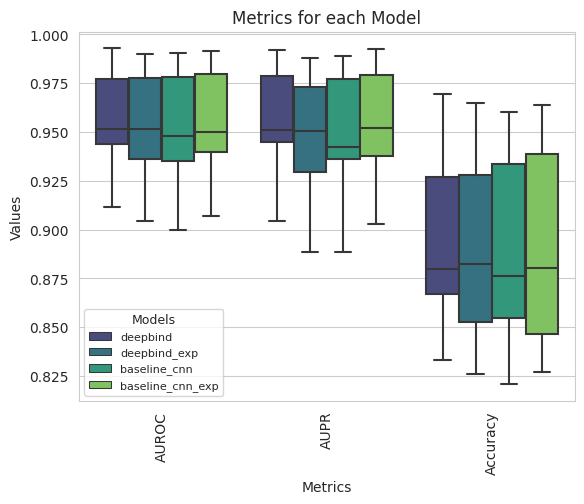

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data from CSV
df = pd.read_csv('perf_data_10rbps.csv', index_col=0)

# Reshape the DataFrame to have a single column for variable names
df_melted = df.melt(id_vars='Model', value_vars=['AUROC', 'AUPR', 'Accuracy'], var_name='Metric')

# Create a bar plot with Seaborn
sns.set_style("whitegrid")
ax = sns.boxplot(x='Metric', y='value', hue='Model', data=df_melted, palette='viridis')

# Customize the plot by setting labels and a title
ax.set(xlabel='Metrics', ylabel='Values')
ax.set_title('Metrics for each Model')

# Display the legend
ax.legend(title='Models', title_fontsize='9', fontsize='8')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.savefig("metrics_plot.svg", dpi=300)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

directory_path = "/home/pgarcia/rbp_project/models_deepbind2"
sal_maps = pd.DataFrame()


# Loop through all files in the directory
for file_path in os.listdir(directory_path):
    data_path = os.path.join(directory_path, file_path)

    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(data_path):

        # Process the file here
        print("Processing:", file_path)

        # Load models
        model = model.load_model(file_path)

        '''Generate Saliency maps'''

        # get the pre-activated outputs
        layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

        #get model predictions for test sequences
        predictions = model.predict(x_test)

        # Get the top num_plots predictions
        num_plots = 10

        # Get the sorted indices
        sorted_indices = np.argsort(predictions[:, 0])[::-1]

        # Extract the top num_plots sequences
        X = x_test[sorted_indices[:num_plots]]

        # Reshape X to (num_plots, 200, 4)
        X = X.reshape((num_plots, 200, 4))




        #########################################################
        import tensorflow as tf

        @tf.function
        def calculate_saliency_map(X, model, class_index=0):
            '''fast function to generate saliency maps'''
            if not tf.is_tensor(X):
                X = tf.Variable(X)

            with tf.GradientTape() as tape:
                tape.watch(X)
                output = model(X)[:,class_index]
            return tape.gradient(output, X)

        # calculate saliency maps
        saliency_map = calculate_saliency_map(X, layer)
        saliency_map = saliency_map.numpy()
        # gradient correction
        saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

        #########################################################
        import pandas as pd
        import logomaker

        def plot_saliency_map(scores, alphabet, ax=None):
            L,A = scores.shape
            counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
            for a in range(A):
                for l in range(L):
                    counts_df.iloc[l,a] = scores[l,a]

            if not ax:
                ax = plt.subplot(1,1,1)
            logomaker.Logo(counts_df, ax=ax)


        saliency_scores = saliency_map * X
        for scores in saliency_scores:
            fig = plt.figure(figsize=(20,1))
            ax = plt.subplot(1,1,1)
            plot_saliency_map(scores, alphabet, ax)

            sal_maps_dict = {
                "Exp": [file_path],
                "Model": [m_func.__name__],
                "sal_maps": plot_saliency_map(scores, alphabet, ax)
            }

            # Convert dictionary to DataFrame
            sal_maps_dict = pd.DataFrame(performance_data)

            # Add new rows to DataFrame
            sal_maps = pd.concat([sal_maps, sal_maps_dict], ignore_index=True)

            plt.savefig("myimg2.svg", dpi=300)
            


In [14]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

directory_path = "/home/pgarcia/rbp_project/models_deepbind2"
sal_plots = []


# Loop through all files in the directory
for file_path in os.listdir(directory_path):
    data_path = os.path.join(directory_path, file_path)

    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(data_path):

        # Process the file here
        print("Processing:", file_path)

        # Load models
        model = model.load_model(file_path)

        '''Generate Saliency maps'''

        # get the pre-activated outputs
        layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

        #get model predictions for test sequences
        predictions = model.predict(x_test)

        # Get the top num_plots predictions
        num_plots = 10

        # Get the sorted indices
        sorted_indices = np.argsort(predictions[:, 0])[::-1]

        # Extract the top num_plots sequences
        X = x_test[sorted_indices[:num_plots]]

        # Reshape X to (num_plots, 200, 4)
        X = X.reshape((num_plots, 200, 4))




        #########################################################
        import tensorflow as tf

        @tf.function
        def calculate_saliency_map(X, model, class_index=0):
            '''fast function to generate saliency maps'''
            if not tf.is_tensor(X):
                X = tf.Variable(X)

            with tf.GradientTape() as tape:
                tape.watch(X)
                output = model(X)[:,class_index]
            return tape.gradient(output, X)

        # calculate saliency maps
        saliency_map = calculate_saliency_map(X, layer)
        saliency_map = saliency_map.numpy()
        # gradient correction
        saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

        #########################################################
        import pandas as pd
        import logomaker

        def plot_saliency_map(scores, alphabet, ax=None):
            L,A = scores.shape
            counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
            for a in range(A):
                for l in range(L):
                    counts_df.iloc[l,a] = scores[l,a]

            if not ax:
                ax = plt.subplot(1,1,1)
            logomaker.Logo(counts_df, ax=ax)


        saliency_scores = saliency_map * X
        for scores in saliency_scores:
            fig = plt.figure(figsize=(20,1))
            ax = plt.subplot(1,1,1)
            plot_saliency_map(scores, alphabet, ax)

            sal_plots.append(fig) 
            fig.savefig("myimg_test.pdf", format='pdf', dpi=300, bbox_inches='tight')


In [ ]:
from rbp_models import deepbind_test


def deepbind_test():
    #Build the model
    model = models.Sequential()
    #layer1
    model.add(layers.InputLayer(input_shape=(200, 4))) # 4 channel input
    #layer2
    model.add(layers.Conv1D(filters=16, kernel_size=24, padding='same'))
    model.add(layers.Activation(activations.relu))
    #layer3
    model.add(layers.MaxPooling1D(pool_size=25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(units=32, activation='relu')) #model says "one hidden layer with 32 ReLu units"?
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(units=1, activation='linear'))
    model.add(layers.Activation('sigmoid'))
    
    
    #print(model.summary())
    return model


model = deepbind_test()
model.layers

In [ ]:

# from rbp_models import deepbind_test, deepbind_exp_test, repre_test, repre_exp_test
#rbp_models_list = [deepbind_test, deepbind_exp_test, repre_test, repre_exp_test]
rbp_model_paths_list = [
    "/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_exp_test",
    "/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_test"
]
for i, path in enumerate(rbp_model_paths_list):
    # model = m_func() # call function to create model
    # load model weights
    # model_path = rbp_model_paths_list[i]
    # model.load_weights(model_path)
    model = tf.keras.models.load_model(path)
    model.summary()


In [ ]:
# Generate saliency map for the same sequence across all 4 models



In [1]:
import tensorflow as tf
from tensorflow import keras
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

2023-10-30 14:55:29.287972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 14:55:29.314886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 14:55:29.315403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 14:55:29.918164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
rbp_model_paths_list = [
    "/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_exp_test",
    "/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_test",
    
 ]
for path in rbp_model_paths_list:
    model = tf.keras.models.load_model(path)
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           1552      
                                                                 
 activation (Activation)     (None, 200, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 16)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [2]:
import pandas as pd
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

2023-10-31 09:20:32.591424: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 09:20:32.618759: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 09:20:32.619267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 09:20:33.174298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_test')

2023-10-31 09:20:42.808705: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
sal_plots = []
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

#get model predictions for test sequences
predictions = model.predict(x_test)

# Get the top num_plots predictions
num_plots = 10

# Get the sorted indices
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Extract the top num_plots sequences
X = x_test[sorted_indices[:num_plots]]

# Reshape X to (num_plots, 200, 4)
X = X.reshape((num_plots, 200, 4))




#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  #plt.savefig("myimg.svg", dpi=300)
  sal_plots.append(fig) 
  
#for fig in sal_plots:
  #fig.savefig("myimg_test2.pdf", format='pdf', dpi=300, bbox_inches='tight')

NameError: name 'x_test' is not defined

In [2]:
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind2/HNRNPK_K562_200.h5 + deepbind_test')

2023-10-30 14:51:47.530167: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           1552      
                                                                 
 activation (Activation)     (None, 200, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 16)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        